# Dataset pre-processing and conversion

https://zenodo.org/record/3746119#.ZCPs7exBwq-

### Setup

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive

Mounted at /gdrive
/gdrive


In [ ]:
!pip install soundfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import h5py
import os
import soundfile as sf

import numpy as np

from tqdm.notebook import tqdm
from time import sleep
from IPython.display import Audio

import matplotlib.pyplot as plt
%matplotlib inline

## h5py data

In [ ]:
!mkdir datasets
!cd datasets
!wget https://doi.org/10.5281/zenodo.3746119

In [ ]:
H5_DATA = '/gdrive/MyDrive/datasets/plate-spring/spring'

In [ ]:
with h5py.File(os.path.join(H5_DATA,'dry_train.h5'), 'r') as f:
    # Print the list of datasets in the file
    print(list(f.keys()))
    Xtrain = np.array(f['Xtrain'])

    # Print information about the dataset
    print(Xtrain.shape)
    print(Xtrain.dtype)

with h5py.File(os.path.join(H5_DATA,'dry_val_test.h5'), 'r') as f:
    # Print the list of datasets in the file
    print(list(f.keys()))
    Xvalidation = np.array(f['Xvalidation'])

    # Print information about the dataset
    print(Xvalidation.shape)
    print(Xvalidation.dtype)

with h5py.File(os.path.join(H5_DATA,'wet_train.h5'), 'r') as f:
    # Print the list of datasets in the file
    print(list(f.keys()))
    Ytrain_0 = np.array(f['Ytrain_0'])

    # Print information about the dataset
    print(Ytrain_0.shape)
    print(Ytrain_0.dtype)

with h5py.File(os.path.join(H5_DATA,'wet_val_test.h5'), 'r') as f:
    # Print the list of datasets in the file
    print(list(f.keys()))
    Yvalidation_0 = np.array(f['Yvalidation_0'])

    # Print information about the dataset
    print(Yvalidation_0.shape)
    print(Yvalidation_0.dtype)

['Xtrain']
(1122, 32000, 1)
float64
['Xvalidation']
(64, 32000, 1)
float64
['Ytrain_0']
(1122, 32000, 1)
float64
['Yvalidation_0']
(64, 32000, 1)
float64


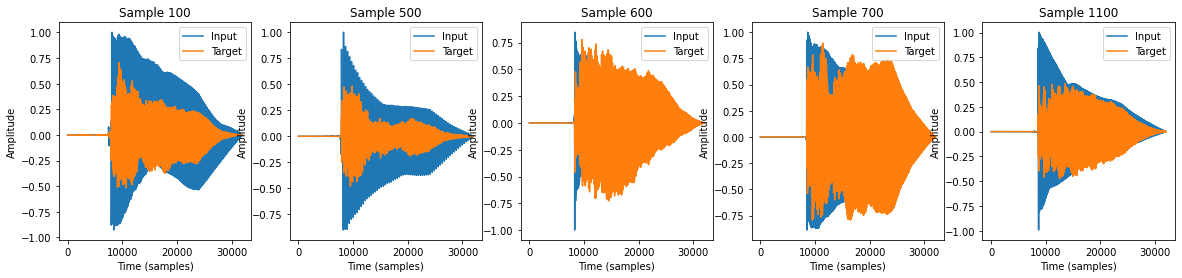

In [ ]:
samples_list = [100, 500, 600, 700, 1100]

# Create a figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=len(samples_list), figsize=(20, 4))

# Loop through the indices and plot the waveform for each example
for i, sample_idx in enumerate(samples_list):
    x = Xtrain[sample_idx, :, 0]
    y = Ytrain_0[sample_idx, :, 0]
    axs[i].plot(x)
    axs[i].plot(y)
    axs[i].set_title(f'Sample {sample_idx}')
    axs[i].set_xlabel('Time (samples)')
    axs[i].set_ylabel('Amplitude')
    axs[i].legend(['Input', 'Target'])

plt.show()

In [ ]:
!cd plate-spring
!mkdir converted/
CONVERTED_DIR = '/gdrive/MyDrive/datasets/plate-spring/converted/'

mkdir: cannot create directory ‘/gdrive/MyDrive/datasets/plate-spring/converted/’: File exists


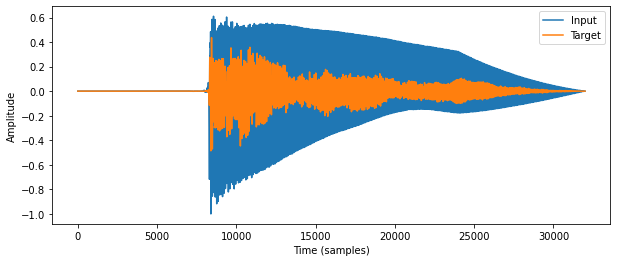

In [ ]:
# Extract audio data for the first example in the training set
x = Xtrain[0, :, 0]
y = Ytrain_0[0, :, 0]

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(x)
plt.plot(y)
plt.legend(['Input', 'Target'])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

# Define file paths
input_file_path = os.path.join(CONVERTED_DIR, 'input.wav')
target_file_path = os.path.join(CONVERTED_DIR, 'target.wav')

# Save the audio files
sf.write(input_file_path, x, 16000)
sf.write(target_file_path, y, 16000)

In [ ]:
# Listen to the audio files
display(Audio(input_file_path))

display(Audio(target_file_path))

In [ ]:
# Concatenate audio data from the first five samples in samples_list
x_concat = np.concatenate([Xtrain[i, :, 0] for i in samples_list[:5]])
y_concat = np.concatenate([Ytrain_0[i, :, 0] for i in samples_list[:5]])

# Save the audio files
sf.write(f'{CONVERTED_DIR}/x_concatenated.wav', x_concat, 16000)
sf.write(f'{CONVERTED_DIR}/y_concatenated.wav', y_concat, 16000)

In [ ]:
# Write the dataset as individual WAV files
sf.write(os.path.join(CONVERTED_DIR, 'Xtrain.wav'), Xtrain.reshape(-1), 16000)
sf.write(os.path.join(CONVERTED_DIR, 'Xvalidation.wav'), Xvalidation.reshape(-1), 16000)
sf.write(os.path.join(CONVERTED_DIR, 'Ytrain_0.wav'), Ytrain_0.reshape(-1), 16000)
sf.write(os.path.join(CONVERTED_DIR, 'Yvalidation_0.wav'), Yvalidation_0.reshape(-1), 16000)